In [14]:
import numpy as np
from keras.layers import BatchNormalization, Conv1D, UpSampling1D, MaxPooling1D
from keras.layers import LeakyReLU, ReLU, Activation, Flatten, Dense, Reshape, Input
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.datasets import mnist
from keras import backend as K
import matplotlib
import matplotlib.pyplot as plt
import time

In [15]:
class ConvAutoencoder:
    @staticmethod
    
    # latentDim: The number of neurons in our fully-connected (Dense) latent vector. By default, if this parameter is not passed, the value is set to 16.
    
    def build(latentDim):

        inputShape = (latentDim, 1)
        
        # define the input to the encoder
        input_img = Input(shape=inputShape)
        x = Conv1D(64, 3, padding='same')(input_img)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = MaxPooling1D(2, padding='same')(x)
        x = Conv1D(32, 3, padding='same')(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = MaxPooling1D(2, padding='same')(x)
        x = Conv1D(16, 3, padding='same')(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        encoded = MaxPooling1D(2, padding='same')(x)

        x = Conv1D(16, 3, padding='same')(encoded)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = UpSampling1D(2)(x)
        x = Conv1D(32, 3, padding='same')(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = UpSampling1D(2)(x)
        x = Conv1D(64, 3, padding='same')(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = UpSampling1D(2)(x)
        x = Conv1D(1, 3, padding='same')(x)
        x = BatchNormalization()(x)
        decoded = Activation('sigmoid')(x)
        
        autoencoder = Model(input_img, decoded)
        
        return autoencoder

In [16]:
EPOCHS = 200
BS = 64

X_quantized = np.loadtxt('datasets/Quantized_100.csv')
X_sampled = np.loadtxt('datasets/Sampled_100.csv')

# splitting
train_size = int(len(X_quantized) * 0.80)
test_size = len(X_quantized) - train_size
X_train, X_test = X_quantized[0:train_size, :], X_quantized[train_size:len(X_quantized), :]

In [17]:
from sklearn import preprocessing
# normalize the data attributes
X_train = preprocessing.normalize(X_train)
X_test = preprocessing.normalize(X_test)

# add a channel dimension to every obs in the dataset
X_train = np.expand_dims(X_train, axis = -1)
X_test = np.expand_dims(X_test, axis = -1)

In [18]:
# construct our convolutional autoencoder
print("[INFO] building autoencoder...")

autoencoder = ConvAutoencoder.build(400)
autoencoder.summary()
autoencoder.compile(loss = 'mse', optimizer = 'adadelta')

[INFO] building autoencoder...
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 400, 1)            0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 400, 64)           256       
_________________________________________________________________
batch_normalization_10 (Batc (None, 400, 64)           256       
_________________________________________________________________
activation_10 (Activation)   (None, 400, 64)           0         
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 200, 64)           0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 200, 32)           6176      
_________________________________________________________________
batch_normalization_11 (Batc

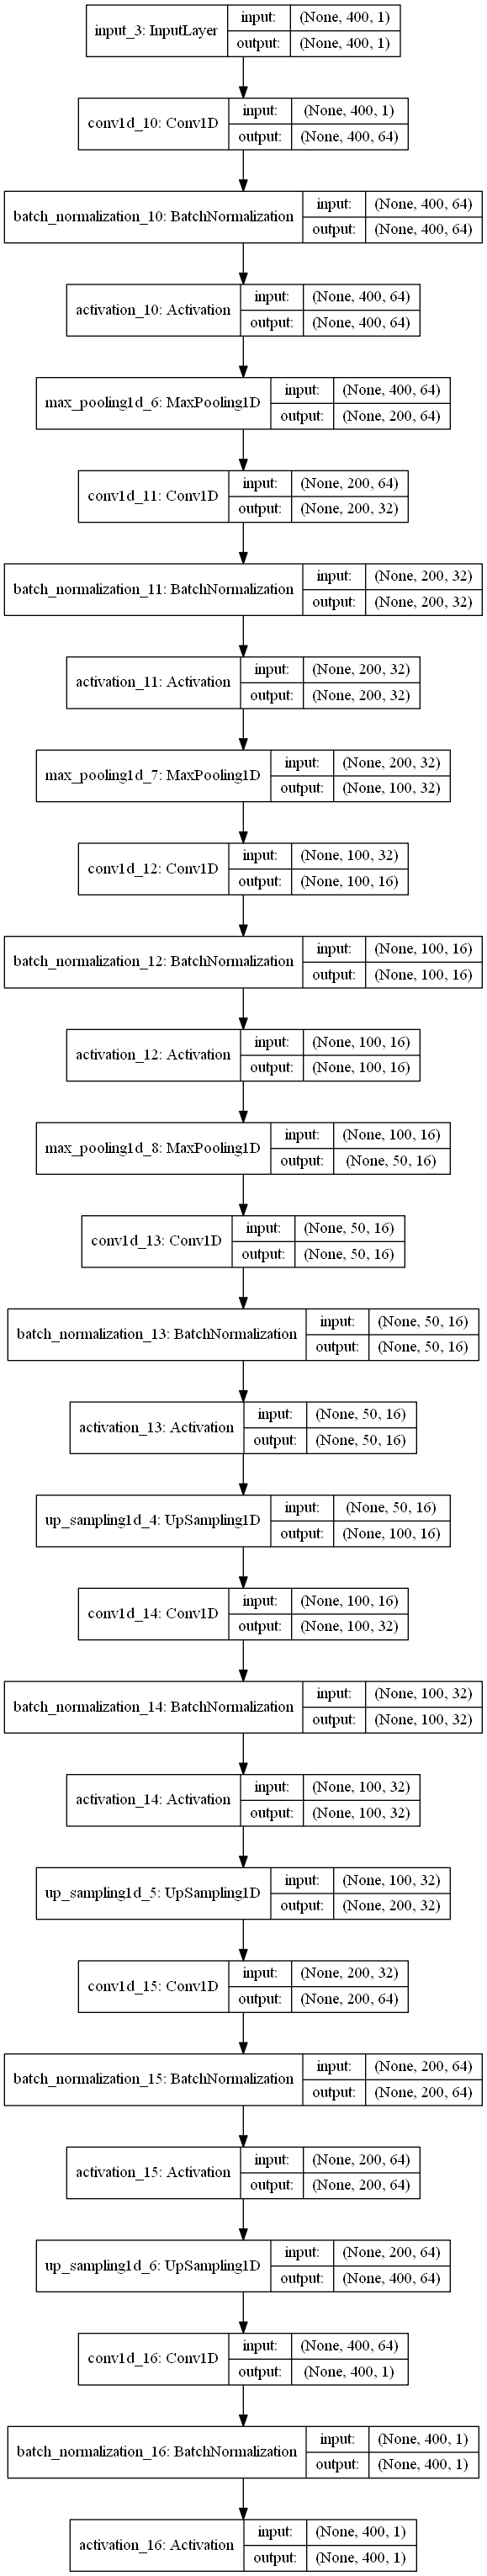

In [19]:
from keras.utils import plot_model
plot_model(autoencoder, to_file = 'autoencoder_cnn.png', show_shapes = True, show_layer_names = True)

In [20]:
start_time = time.time()

# train the convolutional autoencoder (with timing)
# input and output are the same => for image reconstruction
H = autoencoder.fit(X_train, X_train, 
                    validation_data = (X_test, X_test), 
                    epochs = EPOCHS, batch_size = BS)

print('Training took {} seconds'.format(time.time()-start_time))

Train on 1825 samples, validate on 457 samples
Epoch 1/200
1825/1825 [==============================] - 3s 2ms/step - loss: 0.2201 - val_loss: 0.2018
Epoch 2/200
1825/1825 [==============================] - 1s 601us/step - loss: 0.2022 - val_loss: 0.1881
Epoch 3/200
1825/1825 [==============================] - 1s 595us/step - loss: 0.1921 - val_loss: 0.1769
Epoch 4/200
1825/1825 [==============================] - 1s 591us/step - loss: 0.1825 - val_loss: 0.1664
Epoch 5/200
1825/1825 [==============================] - 1s 601us/step - loss: 0.1731 - val_loss: 0.1567
Epoch 6/200
1825/1825 [==============================] - 1s 591us/step - loss: 0.1641 - val_loss: 0.1470
Epoch 7/200
1825/1825 [==============================] - 1s 598us/step - loss: 0.1553 - val_loss: 0.1366
Epoch 8/200
1825/1825 [==============================] - 1s 605us/step - loss: 0.1469 - val_loss: 0.1265
Epoch 9/200
1825/1825 [==============================] - 1s 592us/step - loss: 0.1391 - val_loss: 0.1173
Epoch 10/2

Epoch 78/200
1825/1825 [==============================] - 1s 590us/step - loss: 0.0045 - val_loss: 0.0042
Epoch 79/200
1825/1825 [==============================] - 1s 633us/step - loss: 0.0046 - val_loss: 0.0055
Epoch 80/200
1825/1825 [==============================] - 1s 641us/step - loss: 0.0044 - val_loss: 0.0038
Epoch 81/200
1825/1825 [==============================] - 1s 589us/step - loss: 0.0049 - val_loss: 0.0047
Epoch 82/200
1825/1825 [==============================] - 1s 646us/step - loss: 0.0047 - val_loss: 0.0041
Epoch 83/200
1825/1825 [==============================] - 1s 630us/step - loss: 0.0041 - val_loss: 0.0036
Epoch 84/200
1825/1825 [==============================] - 1s 588us/step - loss: 0.0054 - val_loss: 0.0046
Epoch 85/200
1825/1825 [==============================] - 1s 637us/step - loss: 0.0045 - val_loss: 0.0042
Epoch 86/200
1825/1825 [==============================] - 1s 608us/step - loss: 0.0040 - val_loss: 0.0039
Epoch 87/200
1825/1825 [======================

Epoch 155/200
1825/1825 [==============================] - 2s 839us/step - loss: 0.0011 - val_loss: 0.0011
Epoch 156/200
1825/1825 [==============================] - 1s 724us/step - loss: 0.0011 - val_loss: 0.0012
Epoch 157/200
1825/1825 [==============================] - 1s 744us/step - loss: 0.0011 - val_loss: 0.0011
Epoch 158/200
1825/1825 [==============================] - 1s 656us/step - loss: 0.0011 - val_loss: 0.0011
Epoch 159/200
1825/1825 [==============================] - 1s 665us/step - loss: 0.0011 - val_loss: 0.0011
Epoch 160/200
1825/1825 [==============================] - 1s 756us/step - loss: 0.0011 - val_loss: 0.0011
Epoch 161/200
1825/1825 [==============================] - 1s 651us/step - loss: 0.0011 - val_loss: 0.0010
Epoch 162/200
1825/1825 [==============================] - 1s 701us/step - loss: 0.0011 - val_loss: 0.0011
Epoch 163/200
1825/1825 [==============================] - 2s 939us/step - loss: 0.0011 - val_loss: 0.0012
Epoch 164/200
1825/1825 [============

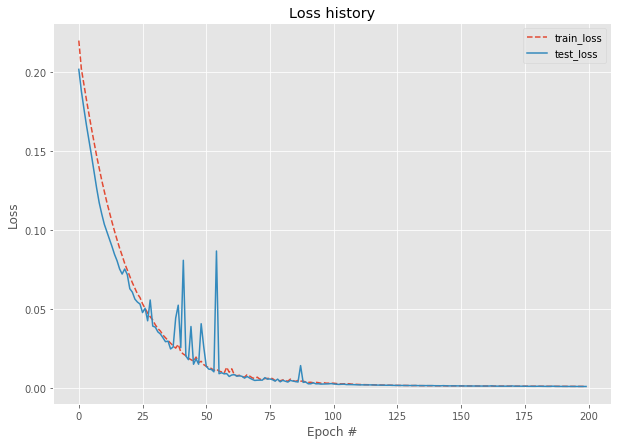

In [21]:
# loss visualization
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize=(10, 7))
plt.plot(N, H.history["loss"], '--', label="train_loss")
plt.plot(N, H.history["val_loss"], label="test_loss")
plt.title("Loss history")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")

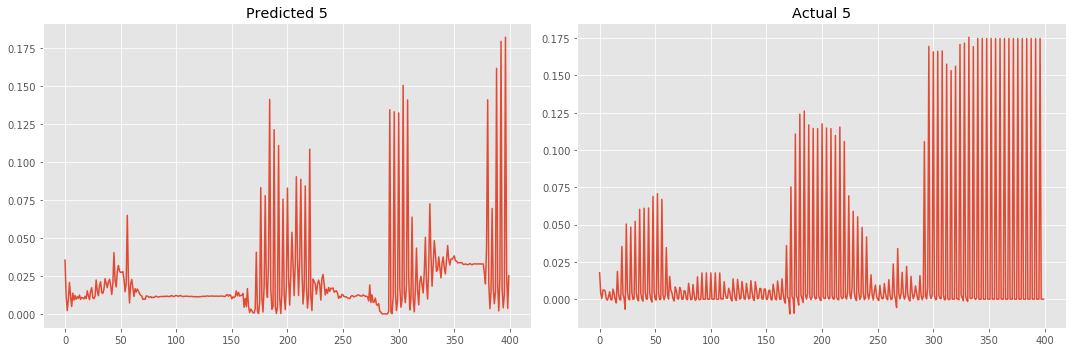

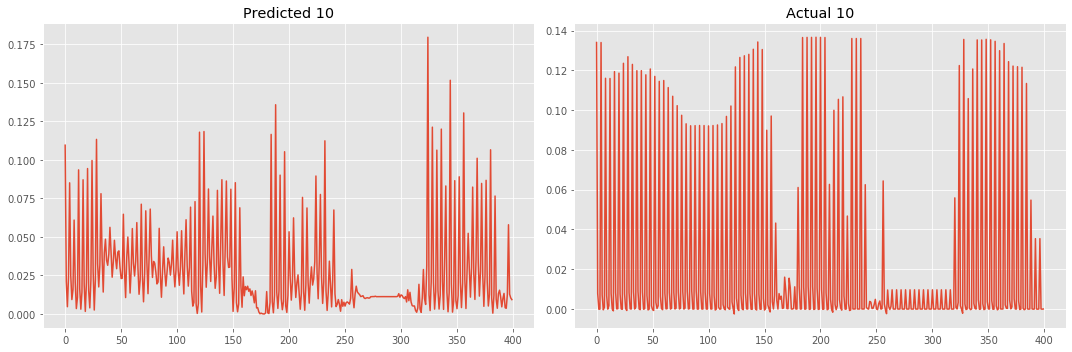

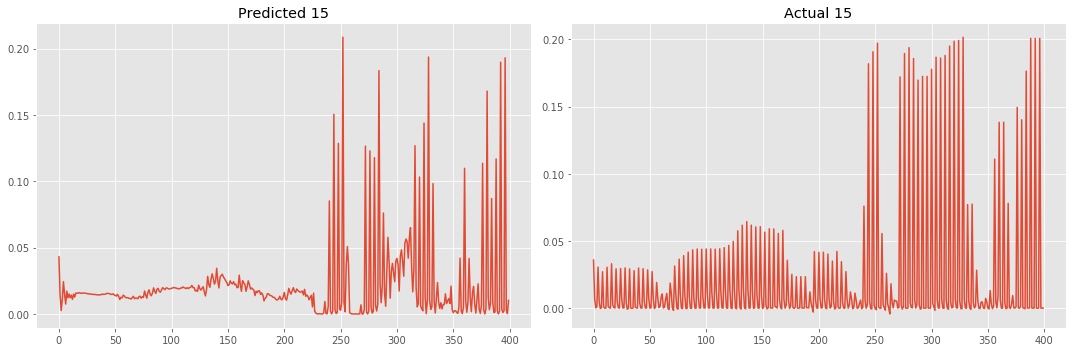

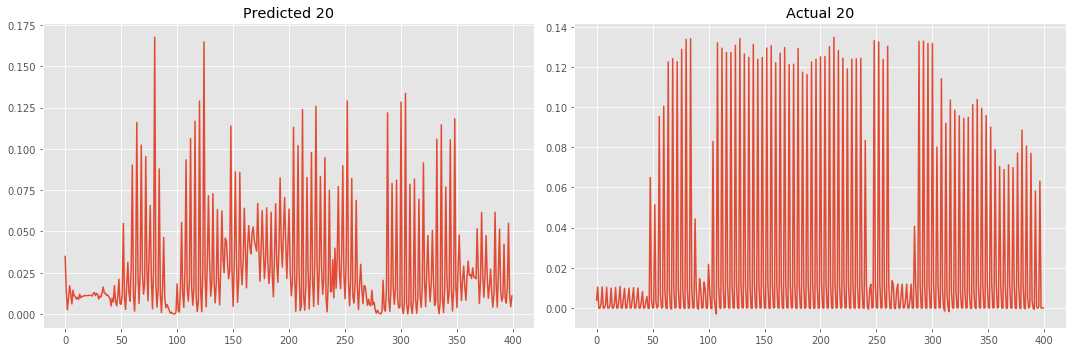

In [22]:
decoded_imgs = autoencoder.predict(X_test)

plt.style.use("ggplot")

for i in range(5, 21, 5):

    fig, ax = plt.subplots(1, 2, figsize = (15, 5))

    ax[0].set_title('Predicted ' + str(i))
    ax[0].plot(decoded_imgs[i, :])
    ax[1].set_title('Actual ' + str(i))
    ax[1].plot(X_test[i, :])

    fig.tight_layout()